In [1]:
!pip install langchain
!pip install langchain-community
!pip install sentence-transformers
!pip install faiss-cpu
!pip install bs4
!pip install langchain-groq
!pip install fitz
!pip install PyMuPDF[Frontend]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.0/974.0 kB 17.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.7/314.7 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.9/124.9 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3
  Attempting uninstall: orjson
    Found existing installation: orjson 3.9.10
    Uninstalling orjson-3.9.10:
      Successfully uninstalled orjson-3.9.10
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 24.4.1 requir

In [2]:
import fitz  # PyMuPDF library
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores import FAISS
from IPython.display import Markdown as md
import os
from getpass import getpass
from langchain_groq import ChatGroq
from langchain.chains import ConversationalRetrievalChain
from langchain.docstore.document import Document

# Load the PDF documents
pdf_files = [f for f in os.listdir("/kaggle/input/data-sample-of-pdf-jobs/Dowloaded jobs") if f.endswith(".pdf")]
documents = []
for pdf_file in pdf_files:
    file_path = os.path.join("/kaggle/input/data-sample-of-pdf-jobs/Dowloaded jobs", pdf_file)
    pdf_doc = fitz.open(file_path)
    for page_index in range(len(pdf_doc)):
        page = pdf_doc[page_index]
        text = page.get_text()
        documents.append(Document(page_content=text, metadata={"source": pdf_file}))
    pdf_doc.close()

# Split the documents into chunks with a specified chunk size
text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=50)
all_splits = text_splitter.split_documents(documents)

# Store the documents into a vector store with a specific embedding model
vectorstore = FAISS.from_documents(all_splits, HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2"))


# Set up the LLM and the ConversationalRetrievalChain
GROQ_API_TOKEN = getpass()
os.environ["GROQ_API_KEY"] = GROQ_API_TOKEN
llm = ChatGroq(temperature=0, model_name="llama3-8b-8192")
chain = ConversationalRetrievalChain.from_llm(llm, vectorstore.as_retriever(), return_source_documents=True)

/opt/conda/lib/python3.10/site-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 0.3.0. An updated version of the class exists in the langchain-huggingface package and should be used instead. To use it run `pip install -U langchain-huggingface` and import as `from langchain_huggingface import HuggingFaceEmbeddings`.
  warn_deprecated(
/opt/conda/lib/python3.10/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
2024-06-11 08:04:00.049827: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-11 08:04:00.049926: E external/local_x

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

 ························································


In [3]:
# Asking question
query = "Please extract only the most specific and relevant hard skills mentioned in the job descriptions. Focus on technical skills, programming languages, tools, frameworks, and methodologies that are directly applicable to the job. Some examples of hard skills include: Python, SQL, Java, C++, AWS, TensorFlow. Provide the hard skills as a comma-separated list of lowercase terms, like this: skill1, skill2, skill3, ... Exclude any soft skills, broad terms, or general areas of study."
result = chain({"question": query, "chat_history": []})
md(result["answer"])

/opt/conda/lib/python3.10/site-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(


Here are the most specific and relevant hard skills mentioned in the job descriptions:

java, python, c++, sql, spring boot, docker, jenkins, rest api, tensorflow, tableau, powerbi, databricks

In [4]:
# striping the text
hard_skills_str = result['answer'].strip()
display(hard_skills_str)

'Here are the most specific and relevant hard skills mentioned in the job descriptions:\n\njava, python, c++, sql, spring boot, docker, jenkins, rest api, tensorflow, tableau, powerbi, databricks'

In [5]:
# Counting the frequency of each skill
hard_skills = [skill.strip().lower() for skill in hard_skills_str.split(',')]
hard_skills = hard_skills[1:]  
hard_skills_freq = {skill: 0 for skill in hard_skills}
for doc in documents:
    text = doc.page_content.lower()
    for skill in hard_skills:
        hard_skills_freq[skill] += text.count(skill)

sorted_hard_skills = sorted(hard_skills_freq.items(), key=lambda x: x[1], reverse=True)

for skill, freq in sorted_hard_skills:
    print(f"{skill}: {freq}")

python: 555
sql: 358
tableau: 94
tensorflow: 48
databricks: 46
c++: 24
docker: 21
powerbi: 8
rest api: 6
spring boot: 5
jenkins: 5


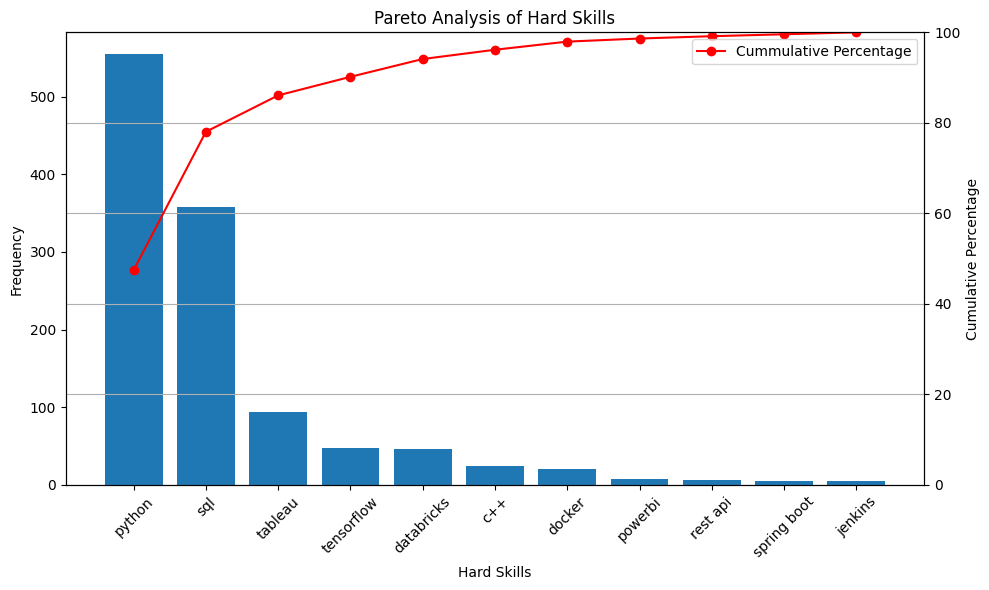

In [6]:
import matplotlib.pyplot as plt

# Perform Pareto analysis
total_occurrences = sum(freq for _, freq in sorted_hard_skills)
cumulative_occurrences = 0
pareto_data = []

for skill, freq in sorted_hard_skills:
    cumulative_occurrences += freq
    pareto_data.append((skill, freq, cumulative_occurrences / total_occurrences * 100))

# Prepare data for the graph
skills, frequencies, cumulative_percentages = zip(*pareto_data)

# Create a new figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the bar graph for frequencies
ax1.bar(skills, frequencies, label="Frequency")
ax1.set_xlabel('Hard Skills')
ax1.set_ylabel('Frequency')
ax1.tick_params(axis='x', rotation=45)

# Create a second y-axis for cumulative percentage
ax2 = ax1.twinx()
ax2.plot(skills, cumulative_percentages, color='red', marker='o', label="Cummulative Percentage")
ax2.set_ylabel('Cumulative Percentage')
ax2.set_ylim(0, 100)

# Add a title to the graph
plt.title('Pareto Analysis of Hard Skills')

# Adjust the layout and display the graph
plt.tight_layout()
plt.grid(True)
plt.legend()
plt.show()